In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
%matplotlib inline

In [132]:
af = np.load("data/final_run/paperslowlong_learning_data.npz")
print(af.keys())

['p_recall', 'p_keys', 'p_error']


(29740,)


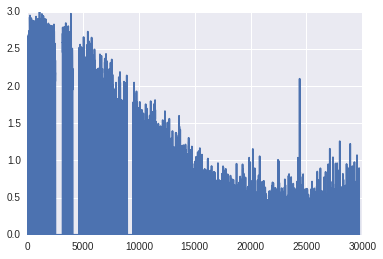

In [133]:
error = np.sum(np.abs(af['p_error']), axis=1)
plt.plot(error)
print(error.shape)

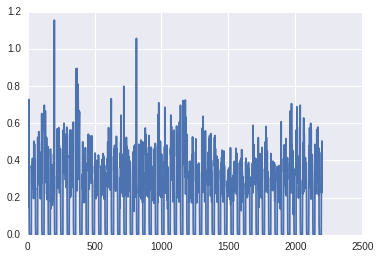

In [136]:
plt.plot(error[20000:22200])

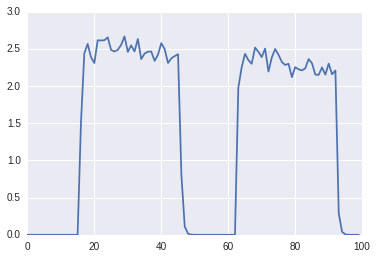

In [10]:
plt.plot(error[:100])

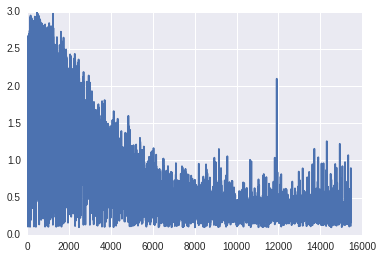

In [137]:
# this might need to be adjusted for the lower entries where the error sits at the minimum of 0.2
filt_err = error[np.where(error > 0.1)]
plt.plot(filt_err)

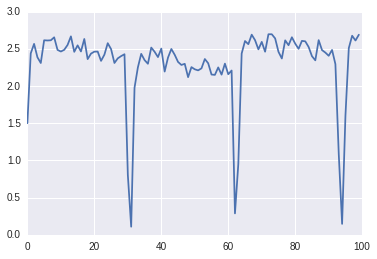

In [39]:
plt.plot(filt_err[:100])

I have no idea how to get rid of those spikes effectively

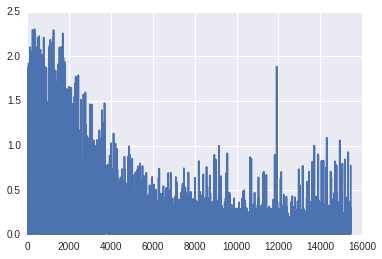

In [138]:
plt.plot(np.abs(np.diff(filt_err)))

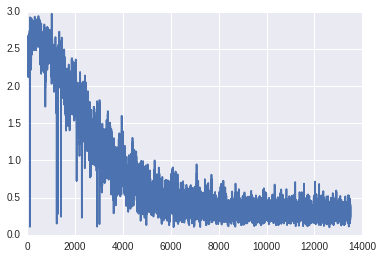

In [139]:
thresh_diff = filt_err[np.where(np.abs(np.diff(filt_err)) < 0.25)]
plt.plot(thresh_diff)

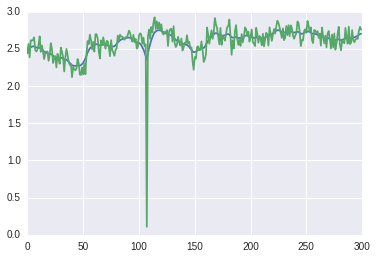

In [140]:
plt.plot(nengo.Lowpass(0.004).filtfilt(thresh_diff[:300]))
plt.plot(thresh_diff[:300])

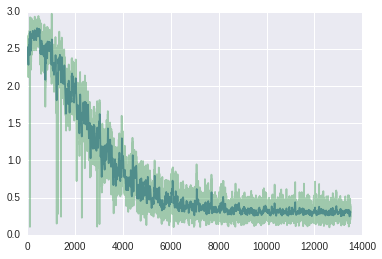

In [141]:
plt.plot(nengo.Lowpass(0.005).filtfilt(thresh_diff))
plt.plot(thresh_diff, alpha=0.5)

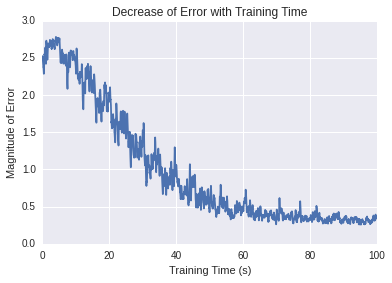

In [146]:
filt_thresh = nengo.Lowpass(0.005).filtfilt(thresh_diff)[:10000]
plt.plot(np.arange(0, filt_thresh.shape[0])*0.01, filt_thresh)
plt.ylim(0, 3)
plt.ylabel("Magnitude of Error")
plt.xlabel("Training Time (s)")
plt.title("Decrease of Error with Training Time")
plt.savefig("error_slow.pdf", format="pdf")

What if I just cheat and take the learning interval which is a constant?

In [76]:
big_diff = np.where(np.abs(np.diff(error)) > 0.50)[0]
print(big_diff[:10])
print(np.diff(big_diff)[:10])

[ 15  16  45  46  62  92 108 109 138 139]
[ 1 29  1 16 30 16  1 29  1 16]


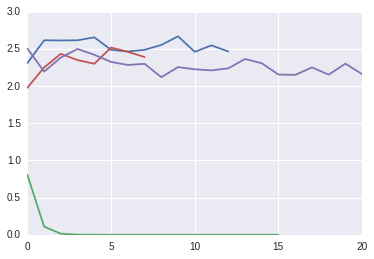

In [77]:
plt.plot(error[20:33])
plt.plot(error[46:62])
plt.plot(error[63:71])
plt.plot(error[71:92])

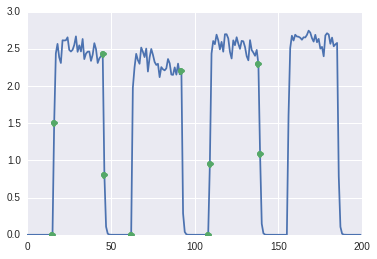

In [81]:
plt.plot(error[:200])
plt.plot(big_diff[:10], error[big_diff[:10]], marker='o', linestyle='None')

[44 30 16 30]


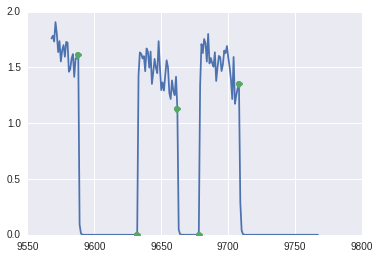

In [93]:
plt.plot(np.arange(error.shape[0])[-200:], error[-200:])
plt.plot(big_diff[-5:], error[big_diff[-5:]], marker='o', linestyle='None')
print(np.diff(big_diff[-5:]))

It looks anything over the size of 15 is safe to take. That means we glue those things together, use them to slice and then make all the downward ones to do a nice interpolation? Why not just do the interpolation in the first place and not bother with the awkard filtering?

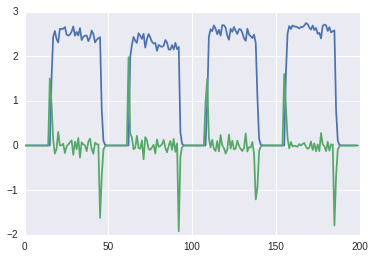

In [96]:
plt.plot(error[:200])
plt.plot(np.diff(error[:200]))

In [108]:
neg_diff = np.where(np.diff(error) < -0.75)[0]
print(neg_diff[:10])
print(error[neg_diff].shape)

[ 45  92 138 139 185 231 232 292 367 441]
(112,)


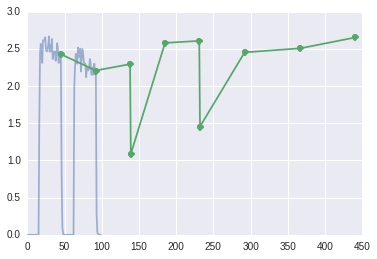

In [110]:
plt.plot(error[:100], alpha=0.5)
plt.plot(neg_diff[:10], error[neg_diff][:10], marker='o')

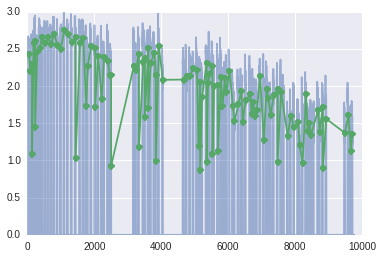

In [118]:
plt.plot(error, alpha=0.5)
plt.plot(neg_diff, error[neg_diff], marker='o')

I have determined that the general trend of the error, with the pauses removed is most informative